In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
import math
ninety_degree=pd.read_excel('C:/programs/CapacitorDegradationAnalysis/90degree.xlsx')
oneZeroFive_degree=pd.read_excel('C:/programs/CapacitorDegradationAnalysis/105degree.xlsx')
ninety_degree=ninety_degree.ix[0:19]
ninety_degree=ninety_degree.drop('number/time',axis=1)
oneZeroFive_degree=oneZeroFive_degree.ix[0:19]
oneZeroFive_degree=oneZeroFive_degree.drop('number/time',axis=1)
df_ninety_degree=pd.DataFrame(ninety_degree,index=np.arange(1,21,1))
df_ninety_degree_transformed=df_ninety_degree.T

df_oneZeroFive_degree=pd.DataFrame(oneZeroFive_degree,index=np.arange(1,21,1))
df_oneZeroFive_degree_transformed=df_oneZeroFive_degree.T


In [170]:
for i in range(19):
    df_ninety_degree[i:i+1]=abs(df_ninety_degree[i:i+1]-df_ninety_degree[0][i+1])
#df_ninety_degree[0:1]=abs(df_ninety_degree[0:1]-df_ninety_degree[0][1])
#df_ninety_degree[1:2]=abs(df_ninety_degree[1:2]-df_ninety_degree[0][2])
df_ninety_degree.drop(0,axis=1,inplace=1)



In [171]:
for i in range(1,20,1):
    for j in range(24,504,24):
        df_ninety_degree[j][i]=math.log(df_ninety_degree[j][i])
#for i in range(1,20,1):
#    for j in range(24,504,24):
#        df_oneZeroFive_degree[j][i]=math.log(df_oneZeroFive_degree[j][i])


C:\Users\Yong Zhang\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [172]:

l=range(24,502,24)
for i in range(len(l)):
    l[i]=float(math.log(l[i]))
l.insert(0,0)
l=np.array(l).reshape(len(l),1)
l

array([[ 0.        ],
       [ 3.17805383],
       [ 3.87120101],
       [ 4.27666612],
       [ 4.56434819],
       [ 4.78749174],
       [ 4.9698133 ],
       [ 5.12396398],
       [ 5.25749537],
       [ 5.37527841],
       [ 5.48063892],
       [ 5.5759491 ],
       [ 5.66296048],
       [ 5.74300319],
       [ 5.81711116],
       [ 5.88610403],
       [ 5.95064255],
       [ 6.01126717],
       [ 6.06842559],
       [ 6.12249281],
       [ 6.1737861 ]])

In [173]:
def show_linear_line(X_parameters,Y_parameters):  
    regr = linear_model.LinearRegression()  
    #This method computes the least squares solution using a singular value decomposition of X. If X is a matrix of size (n, p) this method has a cost of O(n p^2), assuming that n \geq p.
    regr.fit(X_parameters, Y_parameters)  
    plt.scatter(X_parameters,Y_parameters,color='orange')  
    plt.plot(X_parameters,regr.predict(X_parameters),color='black',linewidth=1)  
    plt.xticks(())  
    plt.yticks(())  
    plt.show()
    print "ln_delta_m/m0=", float(regr.coef_),'+',regr.intercept_,"ln_t"
    return regr.coef_,regr.intercept_

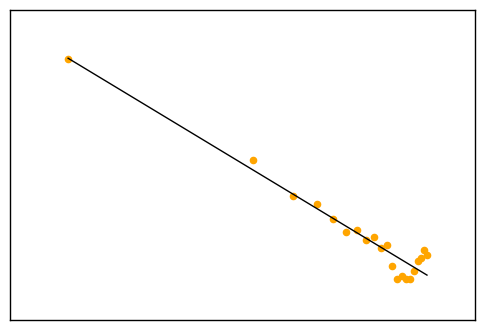

ln_delta_m/m0= -0.013595312085 + 1.16131898052 ln_t


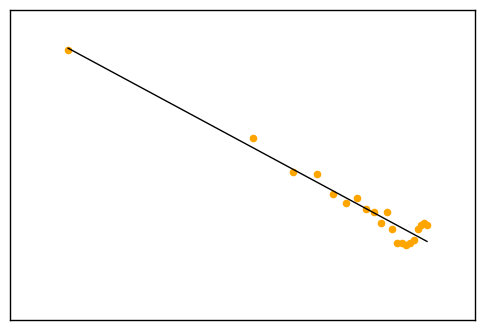

ln_delta_m/m0= -0.0141324518327 + 1.16274190067 ln_t


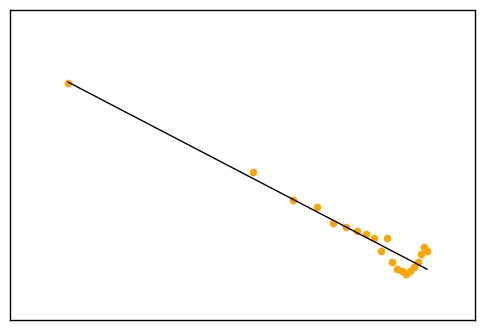

ln_delta_m/m0= -0.0136837203336 + 1.16743146344 ln_t


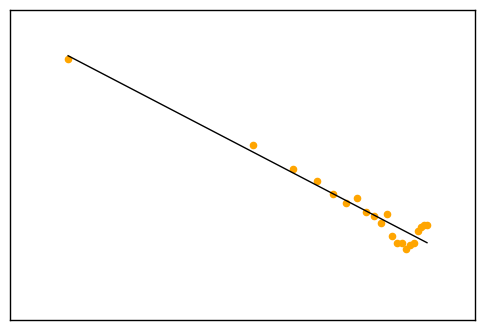

ln_delta_m/m0= -0.0136746523375 + 1.15933811721 ln_t


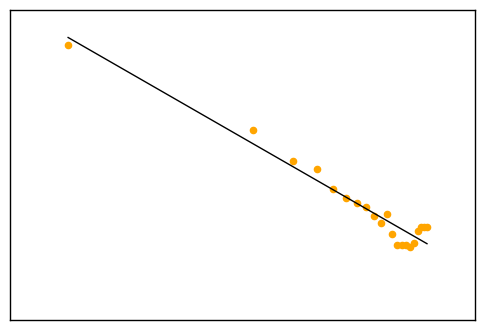

ln_delta_m/m0= -0.0150829773761 + 1.16758273456 ln_t


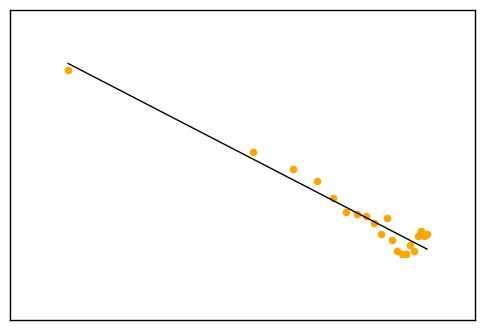

ln_delta_m/m0= -0.0135776343954 + 1.15584888486 ln_t


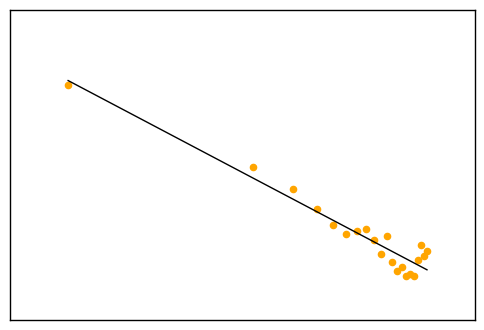

ln_delta_m/m0= -0.013841630075 + 1.14813251674 ln_t


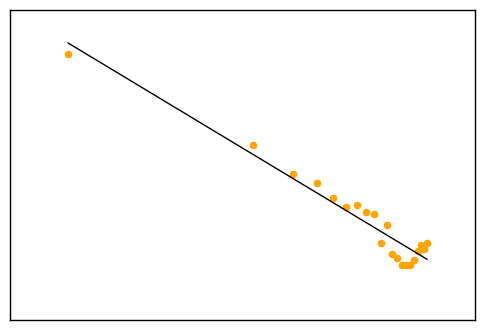

ln_delta_m/m0= -0.0158146365415 + 1.1450817958 ln_t


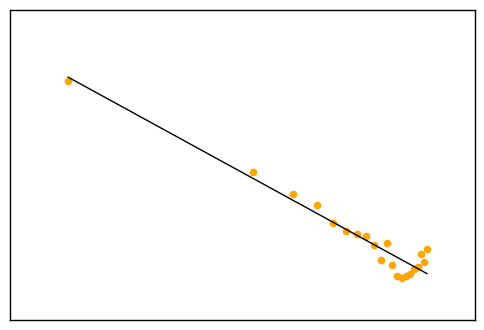

ln_delta_m/m0= -0.0143730760575 + 1.16966958208 ln_t


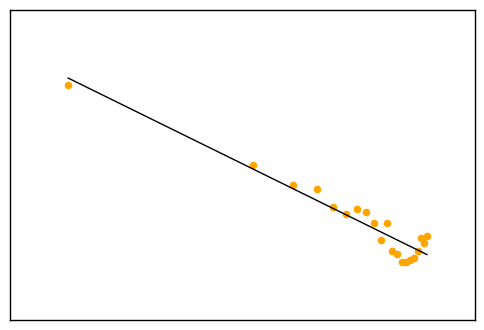

ln_delta_m/m0= -0.0129146371336 + 1.16926749355 ln_t


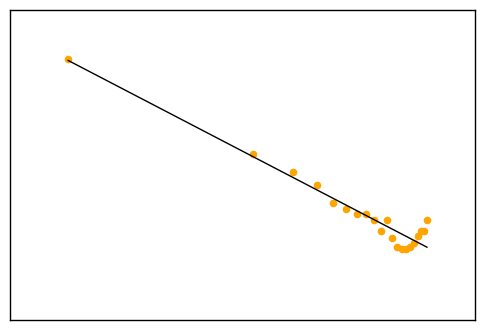

ln_delta_m/m0= -0.0136615945479 + 1.15722465165 ln_t


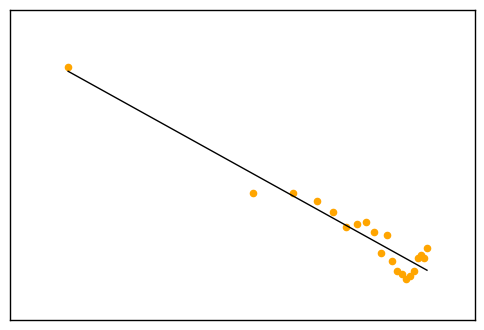

ln_delta_m/m0= -0.0124731681637 + 1.17627939336 ln_t


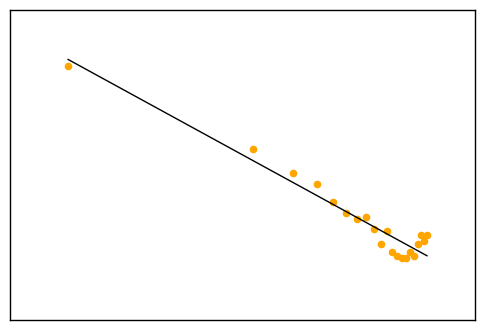

ln_delta_m/m0= -0.0164096800404 + 1.13446337384 ln_t


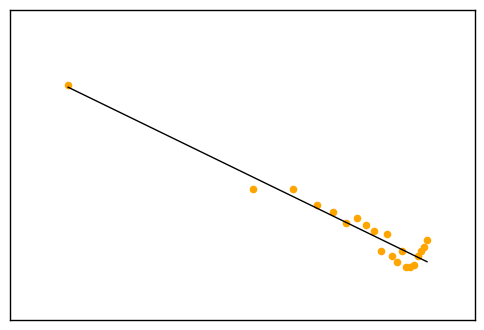

ln_delta_m/m0= -0.0127637084869 + 1.16512545334 ln_t


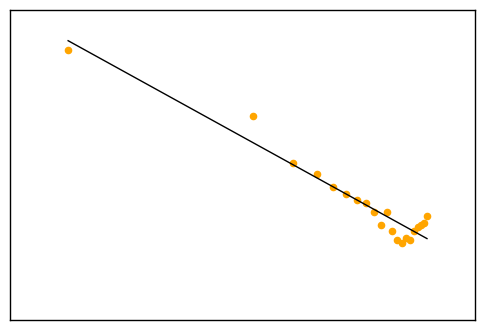

ln_delta_m/m0= -0.0144745148242 + 1.16613348827 ln_t


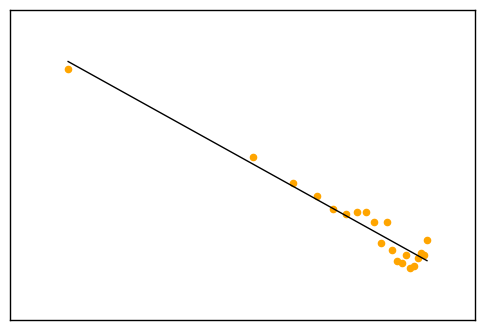

ln_delta_m/m0= -0.0124850189214 + 1.18005343889 ln_t


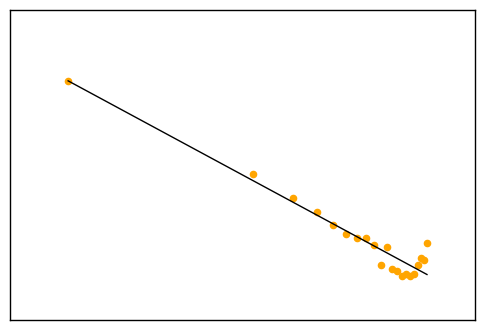

ln_delta_m/m0= -0.0141656255321 + 1.16800442377 ln_t


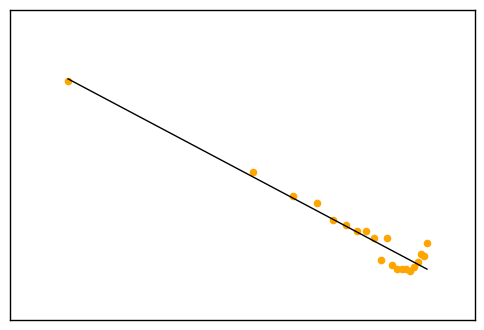

ln_delta_m/m0= -0.0139124940889 + 1.16887081506 ln_t


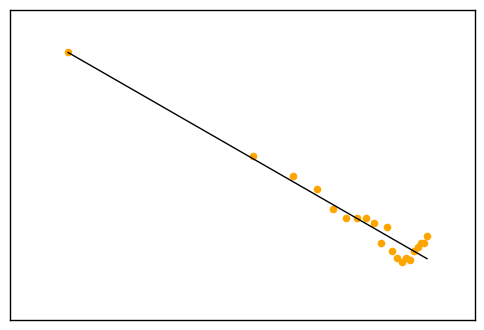

ln_delta_m/m0= -0.0150812519838 + 1.16081212916 ln_t


""


In [181]:
a_list=[]
b_list=[]
for i in range(1,20):
    x=show_linear_line(l,df_ninety_degree_transformed[i])
    a_list.append(float(x[0]))
    b_list.append(float(x[1]))


In [184]:
pd.DataFrame(range(len(a_list)),[a_list,b_list])

,,0
-0.013595,1.161319,0
-0.014132,1.162742,1
-0.013684,1.167431,2
-0.013675,1.159338,3
-0.015083,1.167583,4
-0.013578,1.155849,5
-0.013842,1.148133,6
-0.015815,1.145082,7
-0.014373,1.169670,8
-0.012915,1.169267,9


In [19]:
for i in range(1,20):
    show_linear_line(l,df_oneZeroFive_degree_transformed[i])

,0,24,48,72,96,120,144,168,192,216,...,264,288,312,336,360,384,408,432,456,480
1,1.161,1.122,1.108,1.105,1.099,1.094,1.095,1.091,1.092,1.088,...,1.081,1.076,1.077,1.076,1.076,1.079,1.083,1.084,1.087,1.085
